# 基于逻辑回归的电话营销客户分类预测实验
本实验将演示如何使用逻辑回归模型对银行电话营销客户进行分类预测，包括数据读取、描述性分析与可视化、数据预处理、模型建立、预测与评估等步骤。

## 1. 读取数据
数据集文件名为 `banking_partial.csv`，位于当前目录。

In [1]:
import pandas as pd
data = pd.read_csv('banking_partial.csv', header=0)
data = data.dropna()
# 查看数据维度
print(data.shape)

(41188, 7)


## 2. 描述性分析与可视化分析

In [2]:
# 查看数据的随机五项
data.sample(5)

,job,marital,default,housing,loan,poutcome,y
14909,self-employed,married,no,yes,no,nonexistent,0
9924,admin.,single,no,no,yes,nonexistent,0
25785,blue-collar,married,unknown,unknown,unknown,nonexistent,1
16504,technician,divorced,no,yes,no,nonexistent,0
30231,student,single,unknown,yes,no,nonexistent,0


In [3]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   job       41188 non-null  object
 1   marital   41188 non-null  object
 2   default   41188 non-null  object
 3   housing   41188 non-null  object
 4   loan      41188 non-null  object
 5   poutcome  41188 non-null  object
 6   y         41188 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.2+ MB


C:\Users\saurl\AppData\Local\Temp\ipykernel_27552\2751984150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y',data=data, palette='hls')


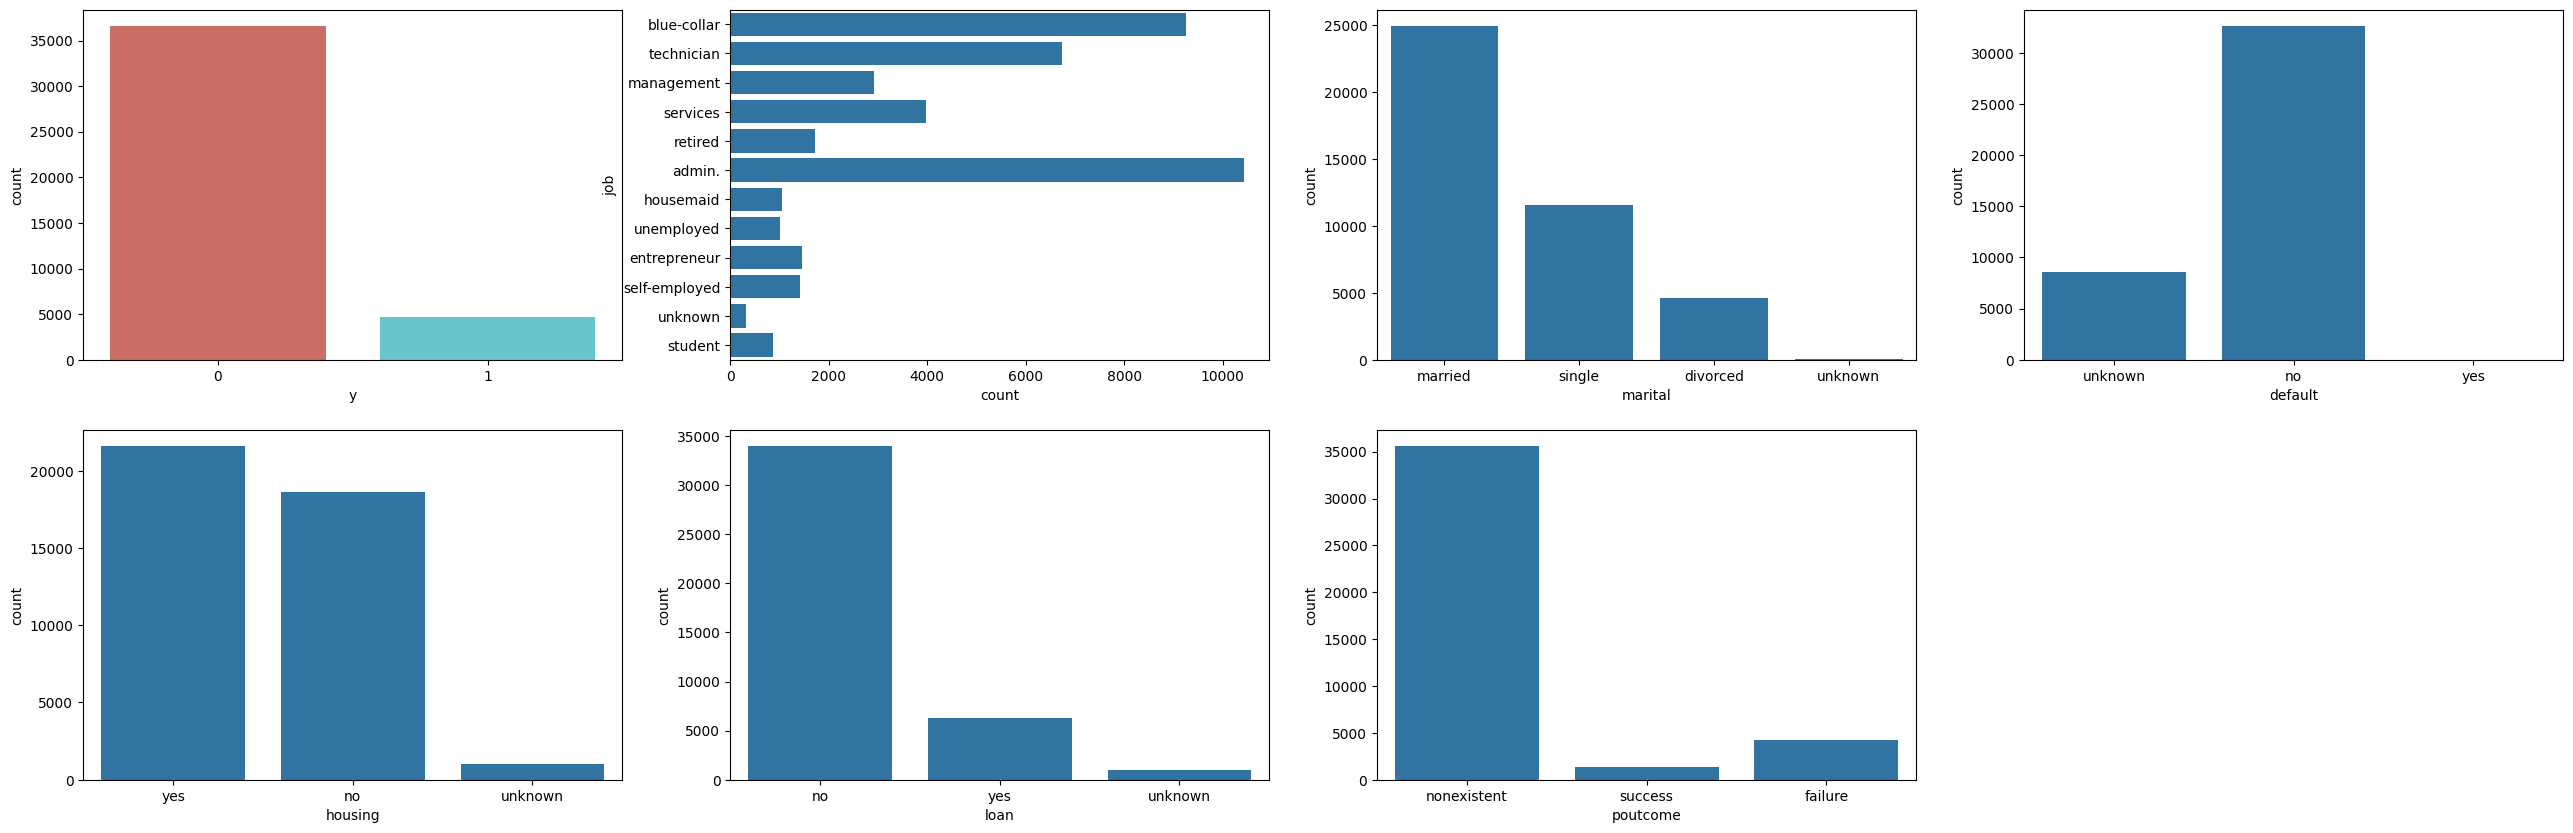

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(32,10))
plt.subplot(241)
sns.countplot(x='y',data=data, palette='hls')
plt.subplot(242)
sns.countplot(y='job', data=data)
plt.subplot(243)
sns.countplot(x='marital', data=data)
plt.subplot(244)
sns.countplot(x='default', data=data)
plt.subplot(245)
sns.countplot(x='housing', data=data)
plt.subplot(246)
sns.countplot(x='loan', data=data)
plt.subplot(247)
sns.countplot(x='poutcome', data=data)
plt.show()

## 3. 数据预处理
离散变量转换为哑变量

In [5]:
data_dummies = pd.get_dummies(data, columns=['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])
data_dummies.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [6]:
data_dummies[['loan_no','loan_unknown','loan_yes']].sample(5,random_state=42)

,loan_no,loan_unknown,loan_yes
32884,True,False,False
3169,False,False,True
32206,True,False,False
9403,False,False,True
14020,True,False,False


In [7]:
# 划分自变量和因变量
X = data_dummies.iloc[:,1:]
y = data_dummies.iloc[:,1]
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2)
X_tr.shape,y_tr.shape

((32950, 28), (32950,))

## 4. 建立逻辑回归模型

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_tr,y_tr)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 5. 模型预测与评估

In [9]:
y_pred = model.predict(X_ts)
pd.DataFrame(y_pred)[0].value_counts()

0
False    6167
True     2071
Name: count, dtype: int64

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_ts,y_pred)

array([[6167,    0],
       [   0, 2071]])

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      6167
        True       1.00      1.00      1.00      2071

    accuracy                           1.00      8238
   macro avg       1.00      1.00      1.00      8238
weighted avg       1.00      1.00      1.00      8238



In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
scores.mean()

np.float64(1.0)

## 6. 实验结论
1. 对于离散变量可以将其转换为哑变量处理。
2. 逻辑回归模型可以有效地区分出营销目标客户。
3. 逻辑回归模型f1-score得分为：请查看上方输出。
4. 交叉验证模型准确率得分为：请查看上方输出。